<a href="https://colab.research.google.com/github/vitorlavor/Projeto/blob/main/Project_HouseRocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PROJECT - House Rocket Company**




Problem description

---

**House Rocket** is a digital platform whose business model is the purchase and sale of properties using technology.

I am a Data Scientist hired by the company to help find the best business opportunities in the real estate market. House Rocket's CEO would like to maximize the company's revenue by finding good business opportunities.

The main idea is to buy good houses at low prices and then resell them later at higher prices into two specific strategies:

* STRATEGY A - Internal renovation: this strategy aims to restructure the internal house space to built bathrooms to match the number of bedrooms. 

* STRATEGY B - External Renovation: this strategy aims to add a built-up area including a master suite in the house (1 bedroom and bathroom).

---
Through a good exploratory data analysis, this project aimed to analyze the impact of the features on the price of the houses and to predict the sale price through regression techniques after the renovations from strategies A and B.

The data set used in this project composes home sales prices for King County, including Seattle from May 2014 to May 2015. The dataset is available on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).

## 1.0. Libraries

In [127]:
import pandas as pd # for data manipulation using dataframes
import numpy as np # for data statistical analysis
from scipy import stats # for statistical analysis 
from scipy.stats import pearsonr # for statistical analysis

import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for fancy data visualization

import folium # for geographic plots plots

from datetime import datetime, date, timedelta # for date manipulation
from dateutil.relativedelta import * # for datetime variable increments

# for machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

## 2.0. Dataset

In [128]:
# Upload from URL

url = 'https://raw.githubusercontent.com/vitorlavor/Projeto/main/kc_house_data.csv'
dataset = pd.read_csv(url)

## 3.0. Dataset Analysis

The objective is to understand the dataset, identify missing values and outliers.

### 3.1. Dataset description

In [129]:
# Visualization of the first 10 lines

dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [130]:
print(f'Dataset: {dataset.shape[0]} sold houses (#rows), {dataset.shape[1]} features (#columns).')

Dataset: 21613 sold houses (#rows), 21 features (#columns).


In [131]:
# Variable types and non-null counts

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [132]:
# Descritive analysis of the features

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [133]:
# Print of unique values for the features

print('ID \n', dataset['id'].nunique())
print('Dates \n', dataset['date'].nunique())
print('Bedrooms \n', np.sort(dataset['bedrooms'].unique()))
print('Bathrooms \n', np.sort(dataset['bathrooms'].unique()))
print('Floors \n', np.sort(dataset['floors'].unique()))
print('Waterfront \n', dataset['waterfront'].unique())
print('Views \n', np.sort(dataset['view'].unique()))
print('Condition \n', np.sort(dataset['condition'].unique()))
print('Grades \n', np.sort(dataset['grade'].unique()))
print('Years Built \n', np.sort(dataset['yr_built'].unique()))
print('Years Renovated \n', np.sort(dataset['yr_renovated'].unique()))
print('Zip Codes \n', np.sort(dataset['zipcode'].unique()))
print('Latitude \n', dataset['lat'].nunique())
print('Longitude \n', dataset['long'].nunique())
print('Square Foot Living \n', dataset['sqft_living'].nunique())
print('Square Foot Lot \n', dataset['sqft_lot'].nunique())
print('Square Foot Living 15\n', dataset['sqft_living15'].nunique())
print('Square Foot Lot 15\n', dataset['sqft_lot15'].nunique())
print('Square Foot Above \n', dataset['sqft_above'].nunique())
print('Square Foot Basement \n', dataset['sqft_basement'].nunique())

ID 
 21436
Dates 
 372
Bedrooms 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 33]
Bathrooms 
 [0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]
Floors 
 [1.  1.5 2.  2.5 3.  3.5]
Waterfront 
 [0 1]
Views 
 [0 1 2 3 4]
Condition 
 [1 2 3 4 5]
Grades 
 [ 1  3  4  5  6  7  8  9 10 11 12 13]
Years Built 
 [1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]
Years Renova


>  Some possible inconsistences are observed, such as a house with 33 bedrooms and houses with no bathrooms/bedrooms.

### 3.2. Data Cleaning

#### 3.2.1. Duplicates

In [134]:
# Check for id duplicates

ids = dataset['id']
dataset[ids.isin(ids[ids.duplicated()])].sort_values('id').head(8) # 353 returns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2496,1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
16814,7200179,20141016T000000,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
16815,7200179,20150424T000000,175000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
11434,109200390,20141020T000000,250000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
11433,109200390,20140820T000000,245000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
12418,123039336,20141208T000000,244900.0,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244
12417,123039336,20140611T000000,148000.0,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244


>  The check for duplicated ids returned 353 items. It means that some houses were sold one or more times in this year-period, with a different price on a  different date. The data will continue in the data set, as the price variation may vary due to the period of the year.

#### 3.2.2. Outliers

In [135]:
# Price

dataset.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


> The houses with the highest sell prices are all possible, accordingly with the other features.

In [136]:
# House with 10+ Bedrooms

dataset[dataset['bedrooms'] >= 10]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


> The house with 33 bedrooms is probably a mistake. The house has only 1 floor and 1.75 bathrooms, so the existence of 33 sleeping rooms is unreasonable. For this reason, this house will be removed.

In [137]:
# Houses with no Bedrooms

dataset[dataset['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


>  Assuming that houses with no bedrooms are probably a typo, these lines will be removed.

In [138]:
# Houses with 6+ Bathrooms

dataset[dataset['bathrooms'] >= 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
4035,685000115,20141007T000000,2150000.0,8,6.00,4340,9415,2.0,0,0,3,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12370,6065300370,20150506T000000,4208000.0,5,6.00,7440,21540,2.0,0,0,3,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


>  Nothing unusual about these houses with 6 or more bathrooms.

In [139]:
# Houses with no Bathrooms

dataset[dataset['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


>  Assuming that houses with no bathrooms are probably a typo, these lines will be removed.

#### 3.2.3. Dropouts

In [140]:
# Drops 

dataset = dataset.drop(dataset[dataset['bedrooms'] == 33].index) # 33 bedooms
dataset = dataset.drop(dataset[dataset['bedrooms'] == 0].index) # 0 bedrooms
dataset = dataset.drop(dataset[dataset['bathrooms'] == 0].index) # 0 bathrooms

# Index reset

dataset = dataset.reset_index(drop = True)

In [141]:
print(f'Clean dataset: {dataset.shape[0]} sold houses (#rows), {dataset.shape[1]} features (#columns). After removing anomalies.')

Clean dataset: 21596 sold houses (#rows), 21 features (#columns). After removing anomalies.


### 3.3. Clean Dataset Overview

**Sold Houses** = 21.596 

**Features:**

* *id* -- 21.436 ID number
* *date* -- 372 days from 02-05-2014 to 27-05-2015

* *bedrooms* -- #bedrooms  1 to 33
* *bathrooms* -- #bathrooms 0.5 to 8 
* *floors* -- #floors 1 - 3.5
* *waterfront* -- 1 or 0
* *view*: #views 0 to 4
* *condition*: 1 to 5
* *grade*: based on the quality of building materials and construction level 1 to 13

* *price* --  75,000 to 7,700,000 dollars
* *sqft_living* -- built area [$\text{ft}^2$] 
* *sqft_lot* -- lot are [$\text{ft}^2$]
* *sqft_above*: built area above ground level [$\text{ft}^2$] 
* *sqft_basement*: basement area [$\text{ft}^2$] (0 if no basement)
* *yr_built*: built year
* *yr_renovated*: year of renovation (0 if not renovated)
* *sqft_living15*: average built area of the 15 nearest neighboring houses [$\text{ft}^2$]
* sqft_lot15: average lot area of the 15 nearest neighboring houses [$\text{ft}^2$]
* *zipcode*: 98001 to 98199
* *lat*: 47.15 - 47.77 
* *long*: -122.51 to -121.31







## 4.0. Feature Analysis




### 4.1. Correlation

In [142]:
# Create a copy to work with in analysis

data_analysis = dataset.copy(deep = True)

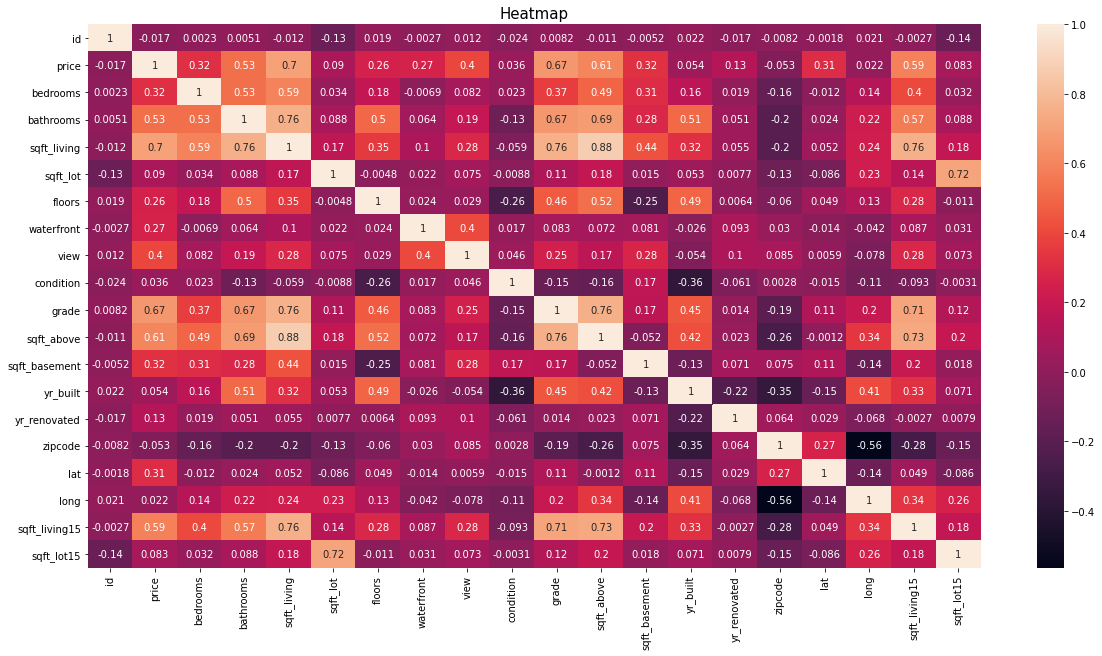

In [143]:
plt.figure(figsize = (20,10)) 

ax = sns.heatmap(data_analysis.corr(), annot = True) 
ax = plt.title('Heatmap', fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("", fontsize = 12)

>  From the analysis of the correlation between the variables, through the heatmap visualization, we can conclude that the variables that most correlate with house *prices* are:

1.   sqft_living (0.70)
2.   grade (0.67)
3.   sqft_above (0.61)
4.   sqft_living15 (0.59)
5.   bathrooms (0.53)
6.   view (0.4)
7.   sqft_basement (0.32)
8.   bedrooms (0.32)
9.   lat (0.31)









### 4.2. Price x Continuum features


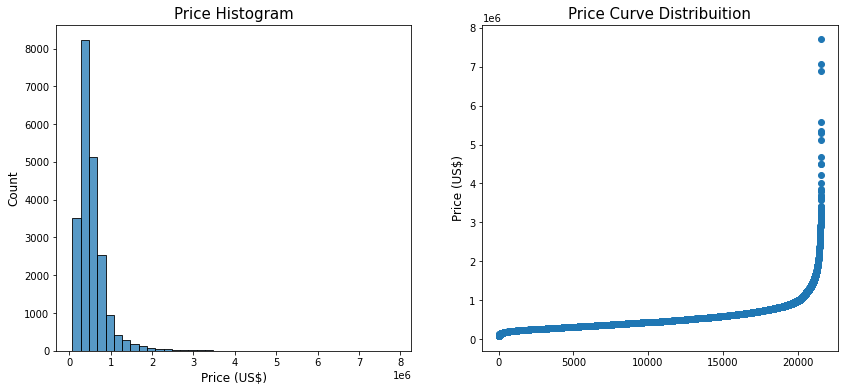

In [144]:
# Price Distribution

plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.histplot(data_analysis['price'], binwidth = 200000)
ax = plt.title('Price Histogram', fontsize = 15)
ax = plt.xlabel("Price (US$)", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
ax = plt.scatter(range(data_analysis.shape[0]), np.sort(data_analysis.price.values))
ax = plt.title("Price Curve Distribuition", fontsize = 15)
ax = plt.xlabel("", fontsize = 12)
ax = plt.ylabel("Price (US$)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

>The histogram shows that most of the houses *prices* fall around US$500,000 and the majority of houses fall in the range from 0 - 1.000.000 dollars, with some houses reaching as far as almost 8 million dollars.

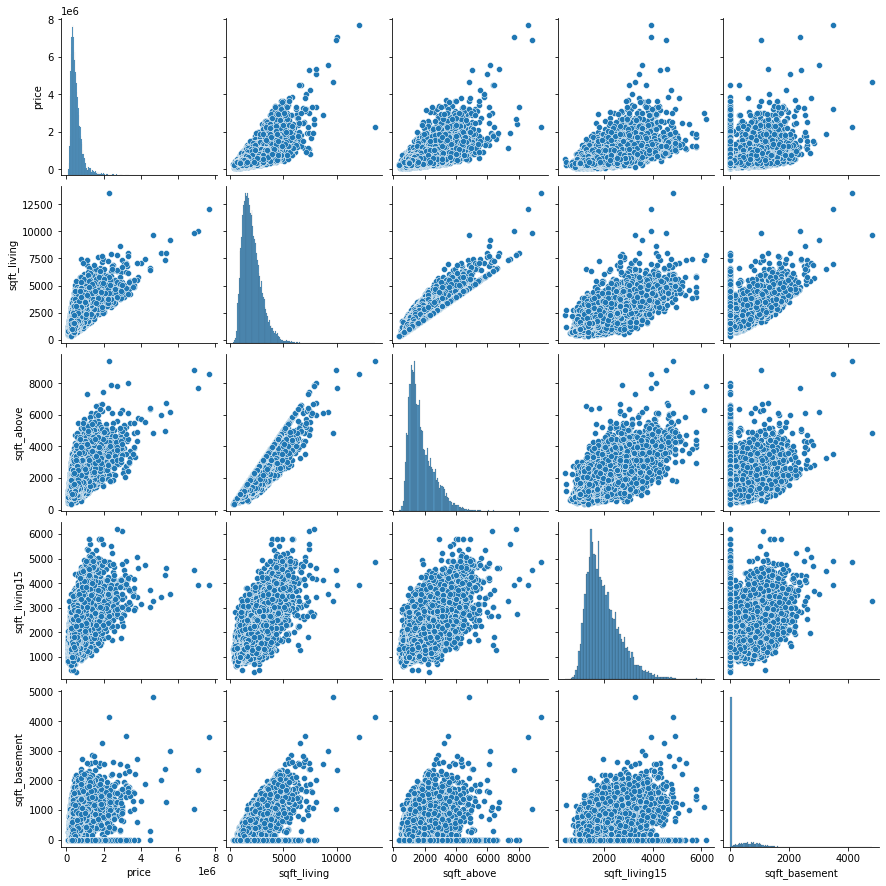

In [145]:
# Pairplot analysis

var = ['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'sqft_basement']

sns.pairplot(data_analysis[var])

>  * The distribution for all features are pretty similar, except for the variable *sqft_basement* which has most values equals 0 - houses without a basement;
>  * It seems that the *price* have a  fairly linear correlation with *sqft_living*, and this trend is better observed for houses with smaller values, becoming more distributed with the increase of the area;
>  * The *sqft_living* variable has a practically linear variation with sqft above. The reason is that *sqft_above* is the *sqft_living* subtracted by *sqft_basement*, which is 0 for most houses.

### 4.3. Price x Bathrooms

In [146]:
# Rounding the Bathrooms feature for better visualization

bath = data_analysis['bathrooms'].round(0).astype(int)

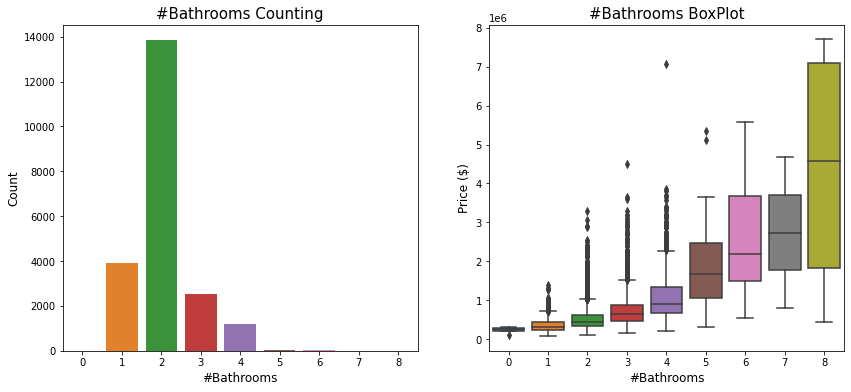

In [147]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(x = bath)
ax = plt.title('#Bathrooms Counting', fontsize = 15)
ax = plt.xlabel("#Bathrooms", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
sns.boxplot(x = bath, y = 'price', data = data_analysis)
ax = plt.title('#Bathrooms BoxPlot', fontsize = 15)
ax = plt.xlabel("#Bathrooms", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Most houses have 2 *bathrooms*, while it is rare to observe houses with 5 or more *bathrooms*. It is quite evident that the *price* increases with the increase in the number of *bathrooms*.

### 4.4. Price x Bedrooms

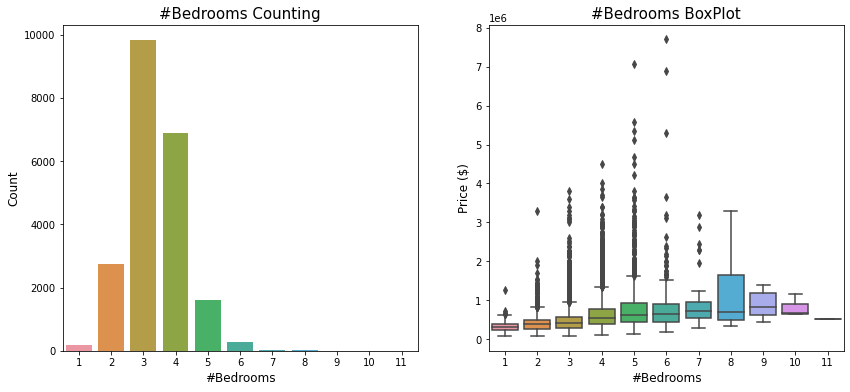

In [148]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(x="bedrooms", data = data_analysis)
ax = plt.title('#Bedrooms Counting', fontsize = 15)
ax = plt.xlabel("#Bedrooms", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
sns.boxplot(x = 'bedrooms', y = 'price', data = data_analysis)
ax = plt.title('#Bedrooms BoxPlot', fontsize = 15)
ax = plt.xlabel("#Bedrooms", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> Most houses have 3 or 4 *bedrooms*, while it is rare to observe houses with 1 or more than 7 *bedrooms*. It seems that the *prices* gradually increase as the *bedrooms* increase until 5, and after that number, the median *price* tend to be more stable. It is also interesting to note that there are no more outliers after 7 bedrooms.


### 4.5. Price x Grade

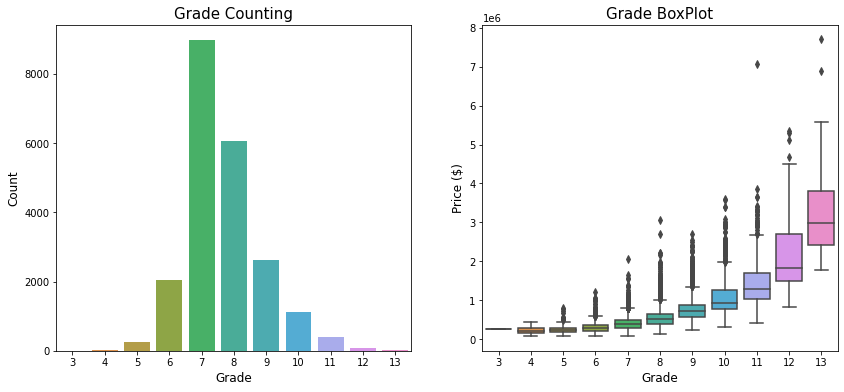

In [149]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(x="grade", data = data_analysis)
ax = plt.title('Grade Counting', fontsize = 15)
ax = plt.xlabel("Grade", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
sns.boxplot(x = 'grade', y = 'price', data = data_analysis)
ax = plt.title('Grade BoxPlot', fontsize = 15)
ax = plt.xlabel("Grade", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

>  The distribution of the *grades* presents what resembles a Gaussian distribution, with most houses presenting an average *grade*, between 7 and 8. It seems that the median *prices* are more stable with lower *grades*, while it gradually increases as the *grade* becomes greater than 7. Interesting to note that the outliers also follow this trend.

>  It is relevant to mention that the grading schema is not presented, so this feature may present bias if the *grade* is given by the professional that prices the house, for example.

### 4.6. Price x View

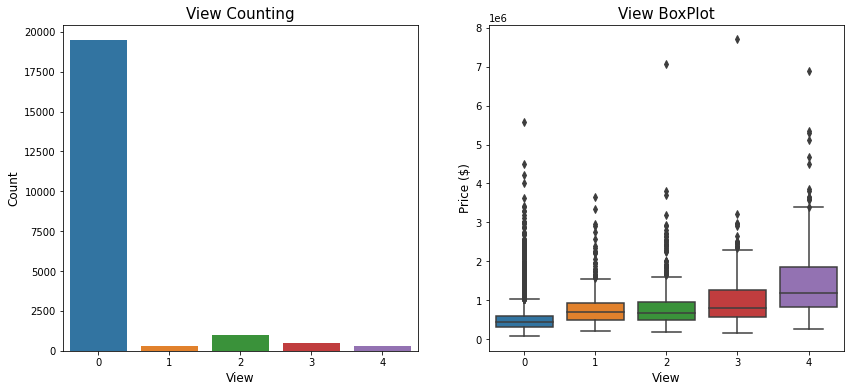

In [150]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
ax = sns.countplot(x="view", data = data_analysis)
ax = plt.title('View Counting', fontsize = 15)
ax = plt.xlabel("View", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

plt.subplot(122)
sns.boxplot(x = 'view', y = 'price', data = data_analysis)
ax = plt.title('View BoxPlot', fontsize = 15)
ax = plt.xlabel("View", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

> The *view* feature is very unbalanced, with most houses presenting no *views* and the lowest median *prices*. 

## 5.0. Hypothesis Formulation





This section aims to answer some formulated hypotheses. The mind map was prepared to visually organize the ideas.

**Hypotheses**

1. The highest-priced homes are located in Seattle;
2. Houses with basement have higher prices;
3. Houses with a built-up area (sqft_living) larger than the 15 nearest neighboring houses (sqft_living15) presents higher prices;
4. Houses renovated in the last 10 years have higher prices;
5. Houses built in the last 10 years have higher prices;
6. The house price is related to the period of the year (day of the week, month, year or season).

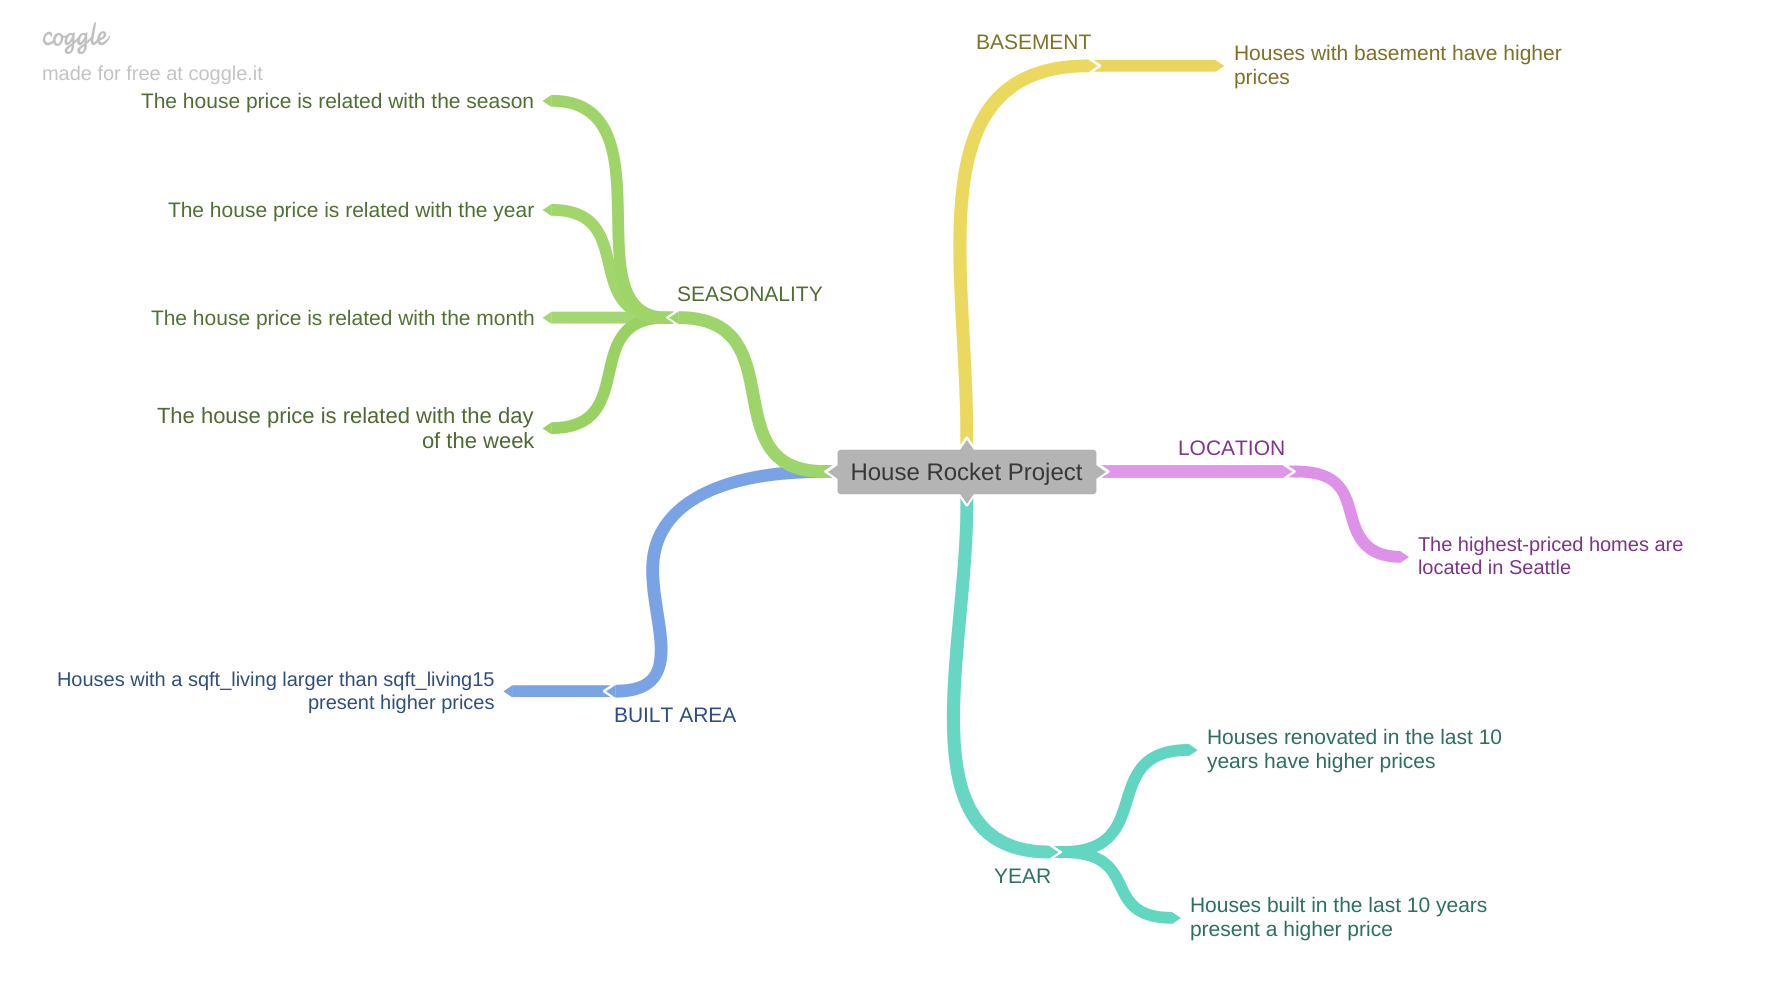

### 5.1. The highest-priced homes are located in Seattle

The *zipcodes* of the central area of Seattle area can be found at [zipmap.net](https://www.zipmap.net/Washington/King_County/Seattle.htm) 

In [151]:
# Seattle zipcodes from zipmap webste

zip_seattle = [98101,98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98177, 98199]

In [152]:
# Encoding the variable -> 0 - outside Seattle | 1 - in Seattle

data_analysis['in_seattle'] = (data_analysis['zipcode'].isin(zip_seattle)).astype(int)

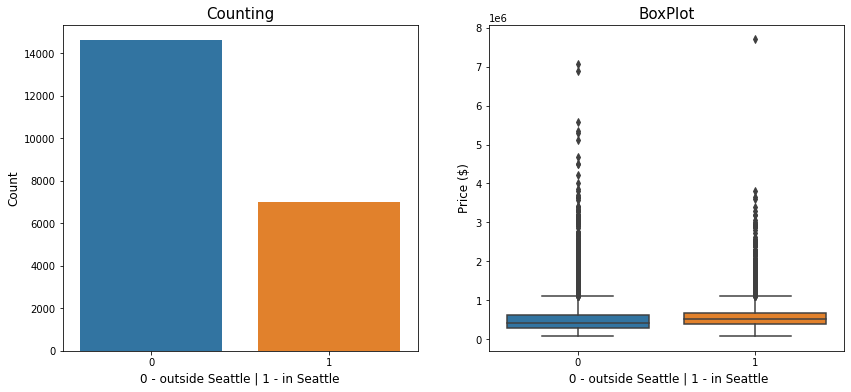

In [153]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="in_seattle", data=data_analysis)
ax = plt.title('Counting', fontsize=15)
ax = plt.xlabel("0 - outside Seattle | 1 - in Seattle", fontsize=12)
ax = plt.ylabel("Count", fontsize=12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'in_seattle', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize=15)
ax = plt.xlabel(" 0 - outside Seattle | 1 - in Seattle", fontsize=12)
ax = plt.ylabel("Price ($)", fontsize=12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [154]:
# Descriptive analysis

seattle_median = data_analysis.groupby('in_seattle').median()['price']
seattle_mean = data_analysis.groupby('in_seattle').mean()['price']

print(f'Median price for houses outside Seattle: {seattle_median[0]} | Mean price for houses outside Seattle: {seattle_mean[0].round(2)}')
print(f'Median price for houses in Seattle: {seattle_median[1]} | Mean price for houses in Seattle: {seattle_mean[1].round(2)}')

Median price for houses outside Seattle: 424000.0 | Mean price for houses outside Seattle: 517460.37
Median price for houses in Seattle: 502000.0 | Mean price for houses in Seattle: 587811.12


**Some conclusions**

>  * Almost twice as many homes sold are located outside Seattle;
>  * Overall, **houses in Seattle have higher prices** compared to off-Seattle houses, based on the mean and median prices.

### 5.2. Houses with basement have higher prices

In [155]:
# Encoding the variable -> 0 - no basement | 1 - basement

data_analysis['basement'] = (data_analysis['sqft_basement'] != 0).astype(int)

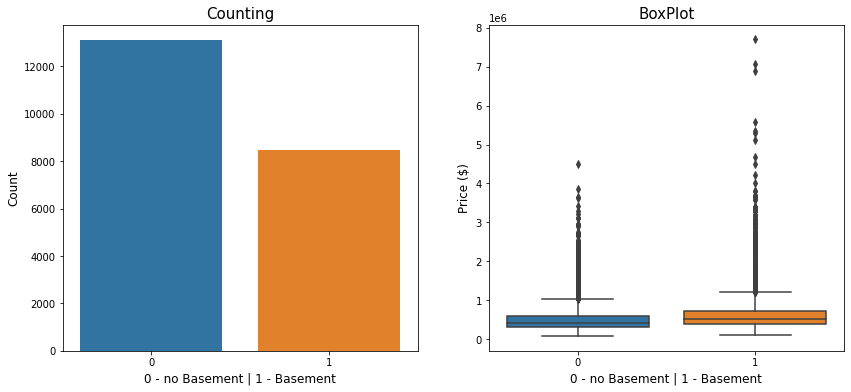

In [156]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="basement", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("0 - no Basement | 1 - Basement", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'basement', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("0 - no Basement | 1 - Basement", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [157]:
# Descriptive analysis

basement_median = data_analysis.groupby('basement').median()['price']
basement_mean = data_analysis.groupby('basement').mean()['price']

print(f'Median price for houses with NO basement: {basement_median[0]} | Mean price for houses with NO basement: {basement_mean[0].round(2)}')
print(f'Median price for houses with basement: {basement_median[1]} | Mean price for houses with basement: {basement_mean[1].round(2)}')

Median price for houses with NO basement: 412000.0 | Mean price for houses with NO basement: 487008.24
Median price for houses with basement: 515000.0 | Mean price for houses with basement: 622371.49


**Some conclusions**

>  * The two categories are fairly balanced, with more houses with no basement;
>  * Overall, **houses with basement have a median price 25% higher than no-basement houses**.

### 5.3. Houses with a built-up arealarger than the 15 nearest neighboring houses presents higher prices

In [158]:
# Encoding the variable -> 0 - sqft_living <= sqft_living15 | 1 - sqft_living > sqft_living15

data_analysis['living_gt15'] = (data_analysis['sqft_living'] > data_analysis['sqft_living15']).astype(int)

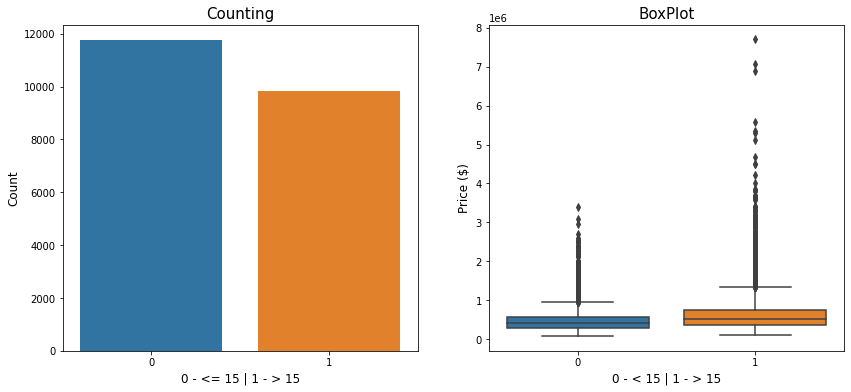

In [159]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="living_gt15", data=data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("0 - <= 15 | 1 - > 15", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'living_gt15', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("0 - < 15 | 1 - > 15", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [160]:
# Descriptive analysis

gt15_median = data_analysis.groupby('living_gt15').median()['price']
gt15_mean = data_analysis.groupby('living_gt15').mean()['price']

print(f'Median price for houses <= 15 neigbors: {gt15_median[0]} | Mean price for houses <= 15 neigbors: {gt15_mean[0].round(2)}')
print(f'Median price for houses > 15 neigbors: {gt15_median[1]} | Mean price for houses > 15 neigbors: {gt15_mean[1].round(2)}')


Median price for houses <= 15 neigbors: 406000.0 | Mean price for houses <= 15 neigbors: 464357.05
Median price for houses > 15 neigbors: 525000.0 | Mean price for houses > 15 neigbors: 630857.78


**Some conclusions**

>  * The two categories are fairly balanced, with more houses smaller than 15 neighbors;
>  * Overall, **houses larger than the 15 closest neights have higher prices**, based on the means and median prices..


In [161]:
# Categorizing based on how for the sqft_living is from sqft_living15

labels = []

for row in range(data_analysis.shape[0]):
  if data_analysis['sqft_living'][row] < (0.7*data_analysis['sqft_living15'][row]):
    labels.append(1)
  elif data_analysis['sqft_living'][row] < (0.9*data_analysis['sqft_living15'][row]):
    labels.append(2)                       
  elif data_analysis['sqft_living'][row] < (1.1*data_analysis['sqft_living15'][row]):
    labels.append(3)
  elif data_analysis['sqft_living'][row] < (1.3*data_analysis['sqft_living15'][row]):
    labels.append(4)
  else:
    labels.append(5)

data_analysis['label_gt15'] = labels

---
Categories:


*   1 -- Houses with sqft_living < 0.7 sqft_living15
*   2 -- Houses with sqft_living >= 0.7 sqft_living15 & sqft_living < 0.9 sqft_living15
*   3 -- Houses with sqft_living >= 0.9 sqft_living15 & sqft_living < 1.1 sqft_living15
*   4 -- Houses with sqft_living >= 1.1 sqft_living15 & sqft_living < 1.3 sqft_living15
*   5 -- Houses sqft_living >= 1.3 sqft_living15

---


In [162]:
# Dataset check

data_analysis[['sqft_living', 'sqft_living15','label_gt15']]

,sqft_living,sqft_living15,label_gt15
0,1180,1340,2
1,2570,1690,5
2,770,2720,1
3,1960,1360,5
4,1680,1800,3
...,...,...,...
21591,1530,1530,3
21592,2310,1830,4
21593,1020,1020,3
21594,1600,1410,4


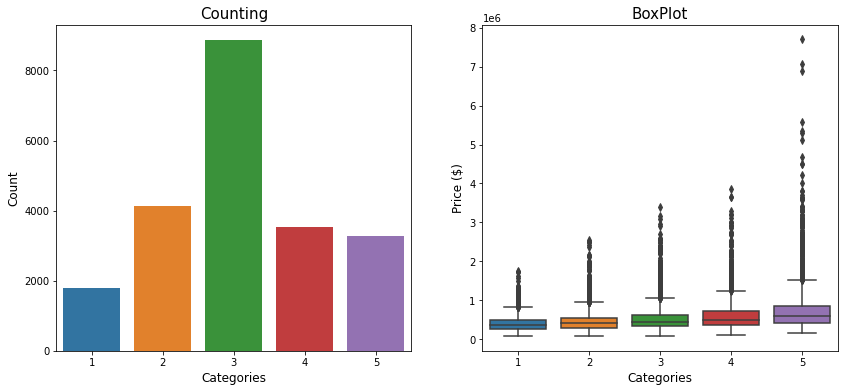

In [163]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="label_gt15", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'label_gt15', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [164]:
# Descriptive analysis

labelgt15_median = data_analysis.groupby('label_gt15').median()['price']
labelgt15_mean = data_analysis.groupby('label_gt15').mean()['price']

print(f'Median price for houses in category 1: {labelgt15_median[1]} | Mean price for houses in category 1: {labelgt15_mean[1].round(2)}')
print(f'Median price for houses in category 2: {labelgt15_median[2]} | Mean price for houses in category 2: {labelgt15_mean[2].round(2)}')
print(f'Median price for houses in category 3: {labelgt15_median[3]} | Mean price for houses in category 3: {labelgt15_mean[3].round(2)}')
print(f'Median price for houses in category 4: {labelgt15_median[4]} | Mean price for houses in category 4: {labelgt15_mean[4].round(2)}')
print(f'Median price for houses in category 5: {labelgt15_median[5]} | Mean price for houses in category 5: {labelgt15_mean[5].round(2)}')

Median price for houses in category 1: 355000.0 | Mean price for houses in category 1: 398004.83
Median price for houses in category 2: 400000.0 | Mean price for houses in category 2: 457917.98
Median price for houses in category 3: 447000.0 | Mean price for houses in category 3: 510179.12
Median price for houses in category 4: 500000.0 | Mean price for houses in category 4: 594098.0
Median price for houses in category 5: 595000.0 | Mean price for houses in category 5: 745466.24


**Some conclusions**

>  * Category 3, which contains houses with similar square footage compared to the neighbors, presents more sold houses;
>  * Overall, **the prices increases when the house increases in size compared to the 15 closest neighbors**, while the prices decrease when the houses are smaller;
>  * The median price for houses in category 3 is 445,000, which is 25.3% higher than the median price of houses of category 1 and 24.9% lower than houses in category 5.

### 5.4. Houses renovated in the last 10 years have higher prices

To check this statement, we must work with the date featuer, separating it by days, months and years. 
The values in *date* are in object format, and are ordered by year, month, day, hour. 

In [165]:
# Modify the date variable to datetime64

data_analysis['date'] = data_analysis['date'].astype('datetime64')


In [166]:
# Encoding the variable -> 0 - not renewed | 1 - renewed

data_analysis['renewed'] = (data_analysis['yr_renovated'] != 0).astype(int)

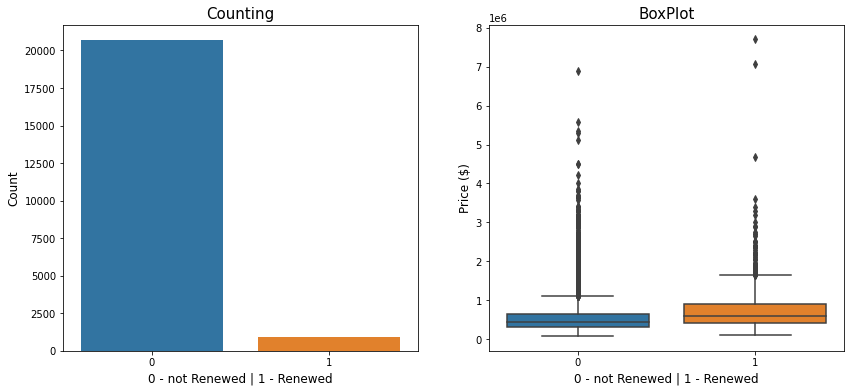

In [167]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="renewed", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("0 - not Renewed | 1 - Renewed", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'renewed', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("0 - not Renewed | 1 - Renewed", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [168]:
# Descriptive analysis

rnwd_median = data_analysis.groupby('renewed').median()['price']
rnwd_mean = data_analysis.groupby('renewed').mean()['price']

print(f'Median price for NOT renewed houses: {rnwd_median[0]} | Mean price for NOT renewed houses: {rnwd_mean[0].round(2)}')
print(f'Median price for renewed houses: {rnwd_median[1].round(2)} | Mean price for renewed houses: {rnwd_mean[1].round(2)}')

Median price for NOT renewed houses: 448000.0 | Mean price for NOT renewed houses: 530467.85
Median price for renewed houses: 600000.0 | Mean price for renewed houses: 760379.03


**Some conclusions**

>  * This class is very unbalanced, with most of houses not renewed;
>  * Despite the lack of balance, **the median price for renewed houses is 33.9% higher than not renewed houses**.

In [169]:
# Separating renewed houses

df_renewed = data_analysis[data_analysis['yr_renovated'] != 0] 
df_renewed = df_renewed.reset_index(drop = True)

In [170]:
# Categorizing based on how old the old the house renovations are

labels = []

for row in range(df_renewed.shape[0]):
  if df_renewed['date'][row].year - df_renewed['yr_renovated'][row] < 10:
    labels.append(1)
  elif df_renewed['date'][row].year - df_renewed['yr_renovated'][row] < 20:
    labels.append(2)
  elif df_renewed['date'][row].year - df_renewed['yr_renovated'][row] < 30:
    labels.append(3)
  elif df_renewed['date'][row].year - df_renewed['yr_renovated'][row] < 40:
    labels.append(4)
  else:
    labels.append(5)

df_renewed['how_old'] = labels

---
Categories:


*   1 -- Houses with < 10 years of renovation
*   2 -- Houses with >= 10 & < 20 years of renovation
*   3 -- Houses with >= 20 & < 30 years of renovation
*   4 -- Houses with >= 30 & < 40 years of renovation
*   5 -- Houses with >= 40 years of renovation

---

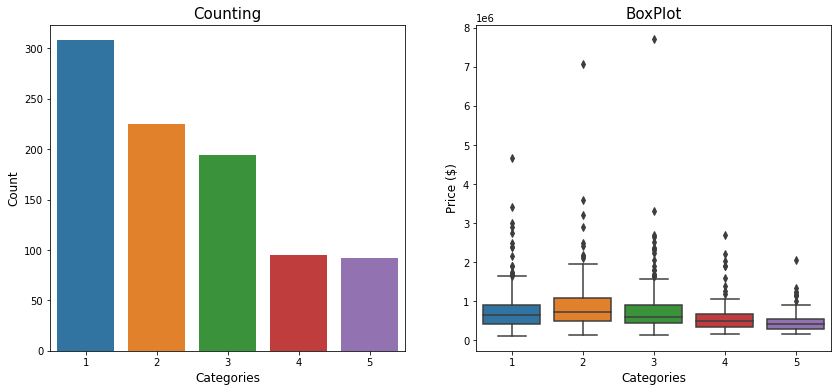

In [171]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="how_old", data = df_renewed)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'how_old', y = 'price', data = df_renewed)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [172]:
# Descriptive analysis

rnwcat_median = df_renewed.groupby('how_old').median()['price']
rnwcat_mean = df_renewed.groupby('how_old').mean()['price']

print(f'Median price for houses in category 1: {rnwcat_median[1]} | Mean price for houses in category 1: {rnwcat_mean[1].round(2)}')
print(f'Median price for houses in category 2: {rnwcat_median[2]} | Mean price for houses in category 2: {rnwcat_mean[2].round(2)}')
print(f'Median price for houses in category 3: {rnwcat_median[3]} | Mean price for houses in category 3: {rnwcat_mean[3].round(2)}')
print(f'Median price for houses in category 4: {rnwcat_median[4]} | Mean price for houses in category 4: {rnwcat_mean[4].round(2)}')
print(f'Median price for houses in category 5: {rnwcat_median[5]} | Mean price for houses in category 5: {rnwcat_mean[5].round(2)}')

Median price for houses in category 1: 645000.0 | Mean price for houses in category 1: 757122.19
Median price for houses in category 2: 725000.0 | Mean price for houses in category 2: 897876.76
Median price for houses in category 3: 600000.0 | Mean price for houses in category 3: 806984.56
Median price for houses in category 4: 495000.0 | Mean price for houses in category 4: 611881.72
Median price for houses in category 5: 413250.0 | Mean price for houses in category 5: 490073.48


**Some conclusions**

>  * The years of renovation seems to an important factor;
>  * However, as we can observe **more expensive houses being sold between 20 to 30 years of renovation**, presenting a median price of 725,000 dollars.

### 5.5. Houses built in the last 10 years present higher prices

In [173]:
# Categorizing based on how old the old the houses are

labels = []

for row in range(data_analysis.shape[0]):
  if data_analysis['date'][row].year - data_analysis['yr_built'][row] < 10:
    labels.append(1)
  elif data_analysis['date'][row].year - data_analysis['yr_built'][row] < 30:
    labels.append(2)
  elif data_analysis['date'][row].year - data_analysis['yr_built'][row] < 50:
    labels.append(3)
  elif data_analysis['date'][row].year - data_analysis['yr_built'][row] < 70:
    labels.append(4)
  else:
    labels.append(5)

data_analysis['year_built'] = labels
#datetime.now().year

---
Categories:


*   1 -- Houses with < 10 years 
*   2 -- Houses with >= 10 & < 30 years 
*   3 -- Houses with >= 30 & < 50 years
*   4 -- Houses with >= 50 & < 70 years
*   5 -- Houses with >= 70 years

---

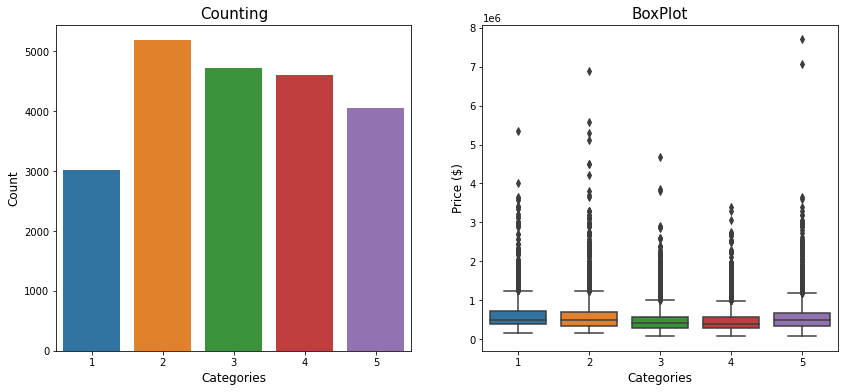

In [174]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="year_built", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'year_built', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Categories", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [175]:
# Descriptive analysis

age_median = data_analysis.groupby('year_built').median()['price']
age_mean = data_analysis.groupby('year_built').mean()['price']

print(f'Median price for houses in category 1: {age_median[1]} | Mean price for houses in category 1: {age_mean[1].round(2)}')
print(f'Median price for houses in category 2: {age_median[2]} | Mean price for houses in category 2: {age_mean[2].round(2)}')
print(f'Median price for houses in category 3: {age_median[3]} | Mean price for houses in category 3: {age_mean[3].round(2)}')
print(f'Median price for houses in category 4: {age_median[4]} | Mean price for houses in category 4: {age_mean[4].round(2)}')
print(f'Median price for houses in category 5: {age_median[5]} | Mean price for houses in category 5: {age_mean[5].round(2)}')

Median price for houses in category 1: 500000.0 | Mean price for houses in category 1: 618276.63
Median price for houses in category 2: 490000.0 | Mean price for houses in category 2: 584973.2
Median price for houses in category 3: 420000.0 | Mean price for houses in category 3: 485654.85
Median price for houses in category 4: 397995.0 | Mean price for houses in category 4: 472341.51
Median price for houses in category 5: 489000.0 | Mean price for houses in category 5: 565313.73


**Some conclusions**

>  * The construction ages seems not to be a relevant feature;
>  * The **houses built in the last 10 years present higher median and mean** (500,000 and 618,276, respectively). However, the median price is not too far from other categories 2 and 5.

### 5.6. The house price is related to the period of the year

In [176]:
# Separate the date feature in year, month and day of week columns

data_analysis['year'] = data_analysis['date'].dt.year
data_analysis['month'] = data_analysis['date'].dt.month
data_analysis['day_week'] = data_analysis['date'].dt.dayofweek

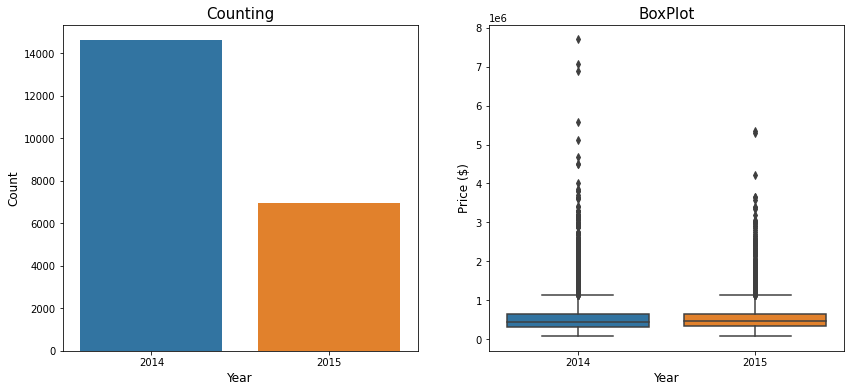

In [177]:
#Year

plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="year", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Year", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'year', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Year", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [178]:
# Descriptive analysis

year_median = data_analysis.groupby('year').median()['price']
year_mean = data_analysis.groupby('year').mean()['price']

print(f'Median price for houses in 2014: {year_median[2014]} | Mean price for houses in 2014: {year_mean[2014].round(2)}')
print(f'Median price for houses in 2015: {year_median[2015]} | Mean price for houses in 2015: {year_mean[2015].round(2)}')


Median price for houses in 2014: 450000.0 | Mean price for houses in 2014: 539245.55
Median price for houses in 2015: 451000.0 | Mean price for houses in 2015: 542195.44


**Some conclusions**

>  * Both median and mean prices are similar between the years.

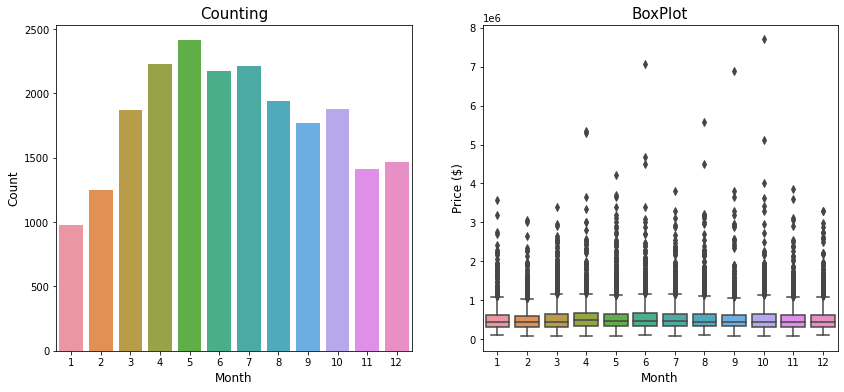

In [179]:
# Month

plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="month", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Month", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'month', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Month", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [180]:
# Descriptive analysis

month_median = data_analysis.groupby('month').median()['price']
month_mean = data_analysis.groupby('month').mean()['price']

print(f'Median price for houses in month 1: {month_median[1]} | Mean price for houses in month 1: {month_mean[1].round(2)}')
print(f'Median price for houses in month 2: {month_median[2]} | Mean price for houses in month 2: {month_mean[2].round(2)}')
print(f'Median price for houses in month 3: {month_median[3]} | Mean price for houses in month 3: {month_mean[3].round(2)}')
print(f'Median price for houses in month 4: {month_median[4]} | Mean price for houses in month 4: {month_mean[4].round(2)}')
print(f'Median price for houses in month 5: {month_median[5]} | Mean price for houses in month 5: {month_mean[5].round(2)}')
print(f'Median price for houses in month 6: {month_median[6]} | Mean price for houses in month 6: {month_mean[6].round(2)}')
print(f'Median price for houses in month 7: {month_median[7]} | Mean price for houses in month 7: {month_mean[7].round(2)}')
print(f'Median price for houses in month 8: {month_median[8]} | Mean price for houses in month 8: {month_mean[8].round(2)}')
print(f'Median price for houses in month 9: {month_median[9]} | Mean price for houses in month 9: {month_mean[9].round(2)}')
print(f'Median price for houses in month 10: {month_median[10]} | Mean price for houses in month 10: {month_mean[10].round(2)}')
print(f'Median price for houses in month 11: {month_median[11]} | Mean price for houses in month 11: {month_mean[11].round(2)}')
print(f'Median price for houses in month 12: {month_median[12]} | Mean price for houses in month 12: {month_mean[12].round(2)}')

Median price for houses in month 1: 438500.0 | Mean price for houses in month 1: 525870.89
Median price for houses in month 2: 426500.0 | Mean price for houses in month 2: 508451.66
Median price for houses in month 3: 450000.0 | Mean price for houses in month 3: 543977.19
Median price for houses in month 4: 477000.0 | Mean price for houses in month 4: 562119.84
Median price for houses in month 5: 462000.0 | Mean price for houses in month 5: 550768.79
Median price for houses in month 6: 465000.0 | Mean price for houses in month 6: 557379.03
Median price for houses in month 7: 465000.0 | Mean price for houses in month 7: 544788.76
Median price for houses in month 8: 442200.0 | Mean price for houses in month 8: 536573.41
Median price for houses in month 9: 450000.0 | Mean price for houses in month 9: 529661.37
Median price for houses in month 10: 447000.0 | Mean price for houses in month 10: 539338.83
Median price for houses in month 11: 435000.0 | Mean price for houses in month 11: 52226

**Some conclusions**

>  * Median and mean prices are similar between the months.


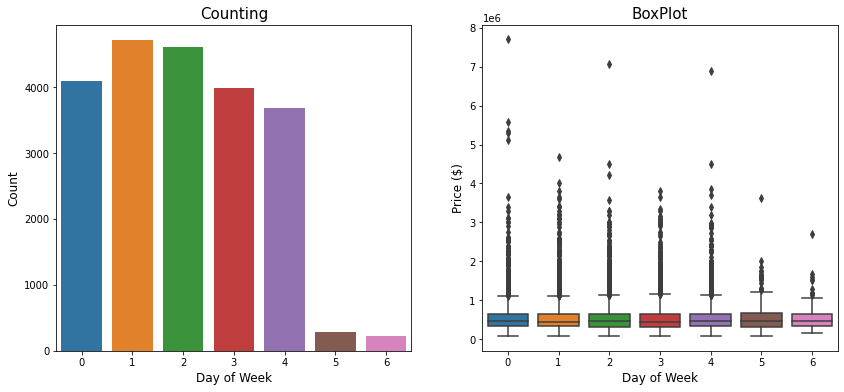

In [181]:
# Day of week

plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
#ax = sns.histplot(dataset, x='price', hue='seattle')
ax = sns.countplot(x="day_week", data=data_analysis)
ax = plt.title('Counting', fontsize=15)
ax = plt.xlabel("Day of Week", fontsize=12)
ax = plt.ylabel("Count", fontsize=12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'day_week', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize=15)
ax = plt.xlabel("Day of Week", fontsize=12)
ax = plt.ylabel("Price ($)", fontsize=12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [182]:
# Descriptive analysis

day_median = data_analysis.groupby('day_week').median()['price']
day_mean = data_analysis.groupby('day_week').mean()['price']

print(f'Median price for houses in day 0: {day_median[0]} | Mean price for houses in day 0: {day_mean[0].round(2)}')
print(f'Median price for houses in day 1: {day_median[1]} | Mean price for houses in day 1: {day_mean[1].round(2)}')
print(f'Median price for houses in day 2: {day_median[2]} | Mean price for houses in day 2: {day_mean[2].round(2)}')
print(f'Median price for houses in day 3: {day_median[3]} | Mean price for houses in day 3: {day_mean[3].round(2)}')
print(f'Median price for houses in day 4: {day_median[4]} | Mean price for houses in day 4: {day_mean[4].round(2)}')
print(f'Median price for houses in day 5: {day_median[5]} | Mean price for houses in day 5: {day_mean[5].round(2)}')
print(f'Median price for houses in day 6: {day_median[6]} | Mean price for houses in day 6: {day_mean[6].round(2)}')


Median price for houses in day 0: 453000.0 | Mean price for houses in day 0: 543906.27
Median price for houses in day 1: 449970.0 | Mean price for houses in day 1: 541167.08
Median price for houses in day 2: 453500.0 | Mean price for houses in day 2: 538659.67
Median price for houses in day 3: 442500.0 | Mean price for houses in day 3: 531601.64
Median price for houses in day 4: 455000.0 | Mean price for houses in day 4: 544330.12
Median price for houses in day 5: 475000.0 | Mean price for houses in day 5: 564950.74
Median price for houses in day 6: 471250.0 | Mean price for houses in day 6: 537103.41


**Some conclusions**

>  * Houses are rarely sold on weekends (5 and 6);
>  * The median and mean prices also seems similar between the day of the week.

In [183]:
# Season

# "day of year" ranges for the northern hemisphere
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons = []

for row in range(dataset.shape[0]):
  doy = data_analysis['date'][row].timetuple().tm_yday
  if doy in spring:
    seasons.append('spring')
  elif doy in summer:
    seasons.append('summer')
  elif doy in fall:
    seasons.append('fall')
  else:
    seasons.append('winter')

data_analysis['season'] = seasons

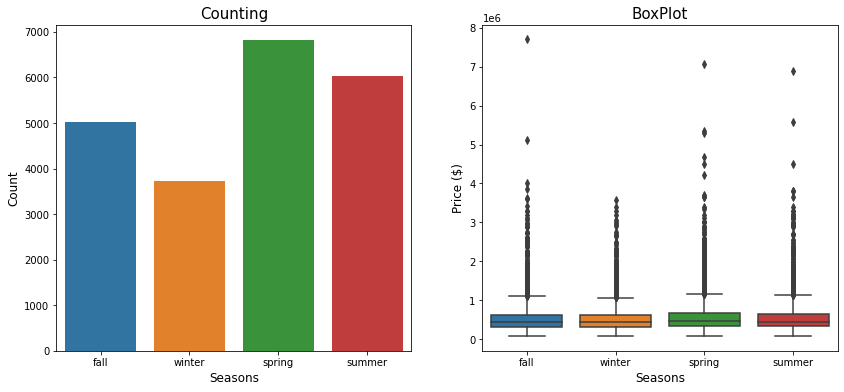

In [184]:
plt.figure(figsize = (14, 6))

ax = plt.subplot(121)
ax = sns.countplot(x="season", data = data_analysis)
ax = plt.title('Counting', fontsize = 15)
ax = plt.xlabel("Seasons", fontsize = 12)
ax = plt.ylabel("Count", fontsize = 12)

ax = plt.subplot(122)
ax = sns.boxplot(x = 'season', y = 'price', data = data_analysis)
ax = plt.title('BoxPlot', fontsize = 15)
ax = plt.xlabel("Seasons", fontsize = 12)
ax = plt.ylabel("Price ($)", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [185]:
# Descriptive analysis

season_median = data_analysis.groupby('season').median()['price']
season_mean = data_analysis.groupby('season').mean()['price']

print(f'Median price for houses in fall: {season_median[0]} | Mean price for houses in fall: {season_mean[0].round(2)}')
print(f'Median price for houses in winter: {season_median[1]} | Mean price for houses in winter: {season_mean[1].round(2)}')
print(f'Median price for houses in spring: {season_median[2]} | Mean price for houses in spring: {season_mean[2].round(2)}')
print(f'Median price for houses in summer: {season_median[3]} | Mean price for houses in summer: {season_mean[3].round(2)}')

Median price for houses in fall: 438925.0 | Mean price for houses in fall: 529620.38
Median price for houses in winter: 470000.0 | Mean price for houses in winter: 558110.63
Median price for houses in spring: 450000.0 | Mean price for houses in spring: 539930.35
Median price for houses in summer: 435000.0 | Mean price for houses in summer: 522085.44


**Some conclusions**

>  * The median and mean prices also seems to be balanced between the seasons;
>  * Based on the mean and median price, **the price of the house does not seem to be related to the period of the year**.

## 6.0. Feature Engineering

Engineering new variables to verify correlation with the price variable.

In [186]:
# Create a copy to work with this section

data_newfeat = data_analysis.copy()
data_newfeat = data_newfeat.reset_index(drop = True)

### 6.1. Bedrooms / sqft_living

In [187]:
# Creating a new feature bed_per_sqft

data_newfeat['bed_per_sqft'] = (data_newfeat['bedrooms'] / data_newfeat['sqft_living'])

In [188]:
# Descriptive analysis 

data_newfeat['bed_per_sqft'].describe()

count    21596.000000
mean         0.001795
std          0.000568
min          0.000292
25%          0.001384
50%          0.001734
75%          0.002128
max          0.006122
Name: bed_per_sqft, dtype: float64

In [189]:
# Pearson correlation with the price

corr, _ = pearsonr(data_newfeat['price'], data_newfeat['bed_per_sqft'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.483


**Some conclusions**

>  * The new feature present a relevant correlation with the *price*.

### 6.2. Bathrooms / Bedrooms

In [190]:
# Creating a new features bat_per_bed

data_newfeat['bat_per_bed'] = (data_newfeat['bathrooms'] / data_newfeat['bedrooms'])

In [191]:
# Descriptive analysis 

data_newfeat['bat_per_bed'].describe()

count    21596.000000
mean         0.640997
std          0.211618
min          0.125000
25%          0.500000
50%          0.625000
75%          0.750000
max          2.500000
Name: bat_per_bed, dtype: float64

In [192]:
# Pearson correlation with the price

corr, _ = pearsonr(data_newfeat['price'], data_newfeat['bat_per_bed'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.281


**Some conclusions**

>  * The new feature presents a fair correlation with the *price*.

In [193]:
# Including the new features into data_analysis

data_analysis['bed_per_sqft'] = data_newfeat['bed_per_sqft']
data_analysis['bat_per_bed'] = data_newfeat['bat_per_bed']

## 7.0. Machine Learning Model

In [194]:
# Check on dataset

data_analysis.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,basement,living_gt15,label_gt15,renewed,year_built,year,month,day_week,season,bed_per_sqft,bat_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,2,0,4,2014,10,0,fall,0.002542,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,1,5,1,4,2014,12,1,fall,0.001167,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,1,0,5,2015,2,2,winter,0.002597,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,1,1,5,0,3,2014,12,1,fall,0.002041,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,3,0,2,2015,2,2,winter,0.001786,0.666667


In [195]:
# Check on feature types

print(data_analysis.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
in_seattle                int64
basement                  int64
living_gt15               int64
label_gt15                int64
renewed                   int64
year_built                int64
year                      int64
month                     int64
day_week                  int64
season                   object
bed_per_

In [196]:
# Transform the object variable (season) values to use in the model

data_analysis = pd.get_dummies(data_analysis, columns=['season'])

In [197]:
# Removing one season category - the other columns profive sufficient information

data_analysis = data_analysis.drop(columns = 'season_winter')

In [198]:
data_analysis.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,basement,living_gt15,label_gt15,renewed,year_built,year,month,day_week,bed_per_sqft,bat_per_bed,season_fall,season_spring,season_summer
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0,0,2,0,4,2014,10,0,0.002542,0.333333,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,1,5,1,4,2014,12,1,0.001167,0.750000,1,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0,0,1,0,5,2015,2,2,0.002597,0.500000,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,1,1,5,0,3,2014,12,1,0.002041,0.750000,1,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0,0,3,0,2,2015,2,2,0.001786,0.666667,0,0,0


### 7.1. Simple Linear Regression

A simple linear regression models a linear relationship between a target and just one explanatory variable. I will start the modeling with the feature that most correlates with the *price* that is *sqft_living*.


In [199]:
# Define all features and target

regression_target = 'price'
features = 'sqft_living'

# Train/test split

train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1) # 80% Train | 20% Test # randomly sampled

X_train = np.array(train[features]).reshape(-1,1)
y_train = train[regression_target]

X_test = np.array(test[features]).reshape(-1,1)
y_test = test[regression_target]

# Instantiate the model

linear_regression = LinearRegression()

# Fit the model

estimator_lr = linear_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_lr_train).round(3)
r2_test = r2_score(y_test, predictions_lr_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)

cv = float(format(cross_val_score(linear_regression, data_analysis[['sqft_living']], data_analysis['price'], cv=5).mean(),'.3f'))

# Table to evaluate the models

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],                           
                           'R2 (training)':[],
                           'R2 (test)':[],
                           'RMSE':[],
                           'MAE':[],
                           'MAPE': [],
                           '5-Fold Cross Validation':[]})

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', '-', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]
evaluation

,Model,Details,R2 (training),R2 (test),RMSE,MAE,MAPE,5-Fold Cross Validation
0,Simple Linear Regression,-,0.494,0.485,252702.686,172919.48,36.34%,0.491


> It is clear that the simple linear regression model presents a poor fitting.

### 7.2. Multiple Regression

The model with no pre-processed features: Multiple Regression 1

In [200]:
# Define all features and target

regression_target = 'price'
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

# Train/test split

train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1) # 80% Train | 20% Test # randomly sampled

X_train = train[features]
y_train = train[regression_target]

X_test = test[features]
y_test = test[regression_target]

# Instantiate the model

linear_regression = LinearRegression()

# Fit the model

estimator_lr = linear_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_lr_train).round(3)
r2_test = r2_score(y_test, predictions_lr_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(linear_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression 1','Not-processed features', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,R2 (training),R2 (test),RMSE,MAE,MAPE,5-Fold Cross Validation
1,Multiple Regression 1,Not-processed features,0.702,0.694,194829.179,126025.71,25.9%,0.696
0,Simple Linear Regression,-,0.494,0.485,252702.686,172919.48,36.34%,0.491


The model with pre-processed features: Multiple Regression 2

In [201]:
# Define all features and target

regression_target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
            'sqft_lot15', 'in_seattle', 'basement', 'living_gt15', 'renewed', 'year_built', 'month', 'year',
            'day_week', 'bed_per_sqft', 'bat_per_bed', 'season_fall', 'season_spring', 'season_summer']

# Train/test split

train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1) # 80% Train | 20% Test # randomly sampled

X_train = train[features]
y_train = train[regression_target]

X_test = test[features]
y_test = test[regression_target]


# Instantiate the model

linear_regression = LinearRegression()

# Fit the model

estimator_lr = linear_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_lr.predict(X_train)
predictions_lr_test = estimator_lr.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_lr_train).round(3)
r2_test = r2_score(y_test, predictions_lr_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(linear_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression 2','Preprocesed features', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,R2 (training),R2 (test),RMSE,MAE,MAPE,5-Fold Cross Validation
2,Multiple Regression 2,Preprocesed features,0.734,0.718,187031.724,119713.45,24.22%,0.727
1,Multiple Regression 1,Not-processed features,0.702,0.694,194829.179,126025.71,25.9%,0.696
0,Simple Linear Regression,-,0.494,0.485,252702.686,172919.48,36.34%,0.491


> The model with the pre-processed features presents better metrics when compared with the model without the pre-processed features and much better than the simple linear regression.

### 7.3. Rigde Regression

The models with $\alpha$ = 10 / $\alpha$ = 100 and $\alpha$ = 1000 will be evaluated.

In [202]:
# Define all features and target

regression_target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
            'sqft_lot15', 'in_seattle', 'basement', 'living_gt15', 'renewed', 'year_built', 'month', 'year',
            'day_week', 'bed_per_sqft', 'bat_per_bed', 'season_fall', 'season_spring', 'season_summer']

# Train/test split

train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1) # 80% Train | 20% Test # randomly sampled

X_train = train[features]
y_train = train[regression_target]

X_test = test[features]
y_test = test[regression_target]


# Instantiate the model

ridge_regression = Ridge(alpha=10)

# Fit the model

estimator_ridge = ridge_regression.fit(X_train, y_train)

# Prediction

predictions_lr_train = estimator_ridge.predict(X_train)
predictions_lr_test = estimator_ridge.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_lr_train).round(3)
r2_test = r2_score(y_test, predictions_lr_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_lr_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(ridge_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression 1',' Alpha = 1', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

# ---------- #

# Instantiate the model

ridge_regression = Ridge(alpha=100)

# Fit the model

estimator_ridge = ridge_regression.fit(X_train, y_train)

# Prediction

predictions_ridge_train = estimator_ridge.predict(X_train)
predictions_ridge_test = estimator_ridge.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_ridge_train).round(3)

r2_test = r2_score(y_test, predictions_ridge_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_ridge_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(ridge_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge regression 2',' Alpha = 100', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]

# ---------- #

# Instantiate the model

ridge_regression = Ridge(alpha = 1000)

# Fit the model

estimator_ridge = ridge_regression.fit(X_train, y_train)

# Prediction

predictions_ridge_train = estimator_ridge.predict(X_train)
predictions_ridge_test = estimator_ridge.predict(X_test)

# Scores:

r2_train = r2_score(y_train, predictions_ridge_train).round(3)

r2_test = r2_score(y_test, predictions_ridge_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_ridge_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_lr_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_lr_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(ridge_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge regression 3',' Alpha = 1000', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,R2 (training),R2 (test),RMSE,MAE,MAPE,5-Fold Cross Validation
2,Multiple Regression 2,Preprocesed features,0.734,0.718,187031.724,119713.45,24.22%,0.727
3,Ridge Regression 1,Alpha = 1,0.718,0.705,191047.503,122855.76,25.42%,0.711
4,Ridge regression 2,Alpha = 100,0.711,0.699,193065.366,122855.76,25.42%,0.704
1,Multiple Regression 1,Not-processed features,0.702,0.694,194829.179,126025.71,25.9%,0.696
5,Ridge regression 3,Alpha = 1000,0.680,0.669,202446.511,122855.76,25.42%,0.673
0,Simple Linear Regression,-,0.494,0.485,252702.686,172919.48,36.34%,0.491


>  The Ridge models present worse metrics as the parameter $\alpha$ becomes greater.

### 7.4. Random Forest Regressor


Random forest regressor model with default hyperparameters: Random Forest 1

For the tree-based models, the features will be standardized using MinMaxScaler.

In [203]:
# Define all features and target

regression_target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
            'sqft_lot15', 'in_seattle', 'basement', 'living_gt15', 'renewed', 'year_built', 'month', 'year',
            'day_week', 'bed_per_sqft', 'bat_per_bed', 'season_fall', 'season_spring', 'season_summer']

# Train/test split

train, test = train_test_split(data_analysis, test_size = 0.2, random_state = 1) # 80% Train | 20% Test # randomly sampled

X_train = train[features]
y_train = train[regression_target]

X_test = test[features]
y_test = test[regression_target]

# Normalization with min/max scaler

scale = MinMaxScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Instantiate the model

forest_regression = RandomForestRegressor(random_state = 1)

# Fit the model

estimator_rf = forest_regression.fit(X_train_scaled, y_train)

# Prediction

predictions_rf_train = estimator_rf.predict(X_train_scaled)
predictions_rf_test = estimator_rf.predict(X_test_scaled)

# Scores:

r2_train = r2_score(y_train, predictions_rf_train).round(3)
r2_test = r2_score(y_test, predictions_rf_test).round(3)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_rf_test)).round(3)
mae_test = mean_absolute_error(y_test, predictions_rf_test).round(2)
mape_test = np.multiply(np.mean(np.abs((y_test - predictions_rf_test) / y_test)), 100).round(2)
cv = float(format(cross_val_score(forest_regression, data_analysis[features], data_analysis['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest 1','Default Hyperparameters', r2_train, r2_test, rmse_test, mae_test, str(mape_test)+'%', cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,R2 (training),R2 (test),RMSE,MAE,MAPE,5-Fold Cross Validation
6,Random Forest 1,Default Hyperparameters,0.982,0.870,127122.313,69886.42,13.24%,0.875
2,Multiple Regression 2,Preprocesed features,0.734,0.718,187031.724,119713.45,24.22%,0.727
3,Ridge Regression 1,Alpha = 1,0.718,0.705,191047.503,122855.76,25.42%,0.711
4,Ridge regression 2,Alpha = 100,0.711,0.699,193065.366,122855.76,25.42%,0.704
1,Multiple Regression 1,Not-processed features,0.702,0.694,194829.179,126025.71,25.9%,0.696
5,Ridge regression 3,Alpha = 1000,0.680,0.669,202446.511,122855.76,25.42%,0.673
0,Simple Linear Regression,-,0.494,0.485,252702.686,172919.48,36.34%,0.491


In [204]:
# Print the importance of each covariate in the random forest regression.
sorted(list(zip(features, forest_regression.feature_importances_)), key=lambda tup: tup[1], reverse = True)

[('grade', 0.34246771948622906),
 ('sqft_living', 0.24918648120652845),
 ('lat', 0.1475421106136704),
 ('long', 0.06118107938045292),
 ('sqft_living15', 0.03021842704229472),
 ('yr_built', 0.02951161623455356),
 ('waterfront', 0.026527632720673426),
 ('sqft_above', 0.021830719507609876),
 ('sqft_lot', 0.01309050951487584),
 ('sqft_lot15', 0.01268301881293856),
 ('zipcode', 0.010625352340975735),
 ('view', 0.010120060701046065),
 ('bed_per_sqft', 0.009392475332160644),
 ('bathrooms', 0.006019733497546055),
 ('bat_per_bed', 0.005025637871013176),
 ('month', 0.004811525447801367),
 ('sqft_basement', 0.0039606345813247),
 ('day_week', 0.003400517946311028),
 ('condition', 0.0024390467041114777),
 ('year_built', 0.0017613139076703185),
 ('floors', 0.0015983129630742572),
 ('bedrooms', 0.0011725177816821885),
 ('in_seattle', 0.0010256648394248427),
 ('season_spring', 0.0009016384645514082),
 ('year', 0.0008853534746829437),
 ('season_summer', 0.0008115287218019367),
 ('renewed', 0.0006393088

>  The random forest model with no hyperparameter tuning clearly overfits the training set.

#### 7.4.1. Hyperparameter tuning with GridSearchCV

In [205]:
# Use the grid to search for best hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2, 4, 6],
    'n_estimators': [100, 500, 1000]
}

# First create the base model to tune

forest_regression = RandomForestRegressor(random_state = 1)

# Random search of parameters, using 3 fold cross validation,

# search across 100 different combinations, and use all available cores
rf_grid = GridSearchCV(estimator = forest_regression, param_grid = param_grid,
                         cv = 3, verbose = 4, return_train_score=True)

# Fit the random search model
rf_grid.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, n_estimators=100, score=(train=0.533, test=0.541), total=   1.8s
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=2, n_estimators=100, score=(train=0.539, test=0.530), total=   1.8s
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=2, n_estimators=100, score=(train=0.616, test=0.548), total=   1.8s
[CV] max_depth=2, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=2, n_estimators=500, score=(train=0.533, test=0.539), total=   8.8s
[CV] max_depth=2, n_estimators=500 ...................................
[CV]  max_depth=2, n_estimators=500, score=(train=0.538, test=0.528), total=   8.8s
[CV] max_depth=2, n_estimators=500 ...................................
[CV]  max_depth=2, n_estimators=500, score=(train=0.613, test=0.543), total=   8.8s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=(train=0.533, test=0.540), total=  17.5s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=(train=0.538, test=0.527), total=  17.5s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=(train=0.614, test=0.544), total=  17.6s
[CV] max_depth=4, n_estimators=100 ...................................
[CV]  max_depth=4, n_estimators=100, score=(train=0.746, test=0.743

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  8.0min finished


**Some conclusions**

>  * Based on r2 metrics for train and test data, the model clearly overfits the training set with max_depth greater than 4;
>  * The model with max_depth equals to 2 provides poor estimates for all n_estimators evaluated;
>  * The r2 metrics for max_depth = 4 is very similar to the model Multiple Regression 2.
>  * Models that have an explicit equation in its formulations like regressions have a superior explainability compared to tree-based models, so it may be better at predicting house prices. For this reason, the model **Multiple Regression 2 will be used to predict the house prices**.

## 8.0. Business Strategies

The Rocket House's CEO requested a business strategy to buy and modernizate houses.

The following strategies will be used:

* **STRATEGY A - Internal renovation**

The internal renovation aims to reestructe the internal space in order to built bathrooms to match the number of bedrooms.

*Strategy 'rules'*
1. Houses with 3 bedrooms and only 1 bathroom will be purchased for the price that was sold in the dataset;
2. Houses with a built area greater than 1800 $ft^2$ will be selected, which allows internal readjustment;
3. Houses that have already been renovated will not be selected;
4. The price limit will be 350,000 dollars;
5. Two more bathrooms will be built in the house;
6. The construction cost per bathroom will be 9,000 dollars;
7. There will be no modification of the built area;
8. The construction will be completed within 2 months.

---
* **STRATEGY B - External Renovation**

The external renovation aims to add a built-up area including a master suite in the house (1 bedroom and bathroom).


*Strategy 'rules'*

1. Houses with 2 bedrooms will be purchased for the price that was sold in the dataset and on the same date;
2. Houses with a built area greater than 1000 $ft^2$ will be selected;
3. Houses in lot area greater than 4000 $ft^2$ will be selected;
4. Houses that have already been renovated will not be selected;
5. The price limit  will be 250,000 dollars;
6. 1 more bedroom and bathroom will be built in the house;
7. The construction cost per suite will be 50,000 dollars;
8. The built area will increase by 140 $ft^2$ after the construction;
9. The construction will be completed within 4 months.

*The construction costs were estimated based on the [Home Advisor website](https://www.homeadvisor.com/cost/additions-and-remodels/build-an-addition/), which states that the construction of a suite costs between 25 and 75 thousand dollars and the construction of an extra bathroom costs 6 to 15 thousand dollars.


###  8.1. Strategy A

#### 8.1.1. Data Preparation

In [206]:
# Create a copy to work with in strategy A

data_a = dataset.copy()

# Aplying some filters:

# Filter 1 #Bedrooms = 3
data_a = data_a[data_a['bedrooms'] == 3] # 9824 houses 

# Filter 2 #Bathroms = 1
data_a = data_a[data_a['bathrooms'] == 1] # 1780 houses

# Filter 3 not renewed
data_a = data_a[data_a['yr_renovated'] == 0] # 624 houses

# Filter 4 sqft > 1800 sqft
data_a = data_a[data_a['sqft_living'] > 1800]# 81 houses

# Filter 5 price < 350001
data_a = data_a[data_a['price'] < 350001] # 35 houses

data_a = data_a.reset_index(drop = True)

In [207]:
## Data Preparation

# Seattle

data_a['in_seattle'] = (data_a['zipcode'].isin(zip_seattle)).astype(int)

# Basement

data_a['basement'] = (data_a['sqft_basement'] != 0).astype(int)

# Greater than 15 neighbors

data_a['living_gt15'] = (data_a['sqft_living'] > data_a['sqft_living15']).astype(int)

# Renewed

data_a['date'] = data_a['date'].astype('datetime64') # to modify date feature
data_a['renewed'] = (data_a['yr_renovated'] != 0).astype(int)

# Built Year

labels = []

for row in range(data_a.shape[0]):
  if data_a['date'][row].year - data_a['yr_built'][row] < 10:
    labels.append(1)
  elif data_a['date'][row].year - data_a['yr_built'][row] < 30:
    labels.append(2)
  elif data_a['date'][row].year - data_a['yr_built'][row] < 50:
    labels.append(3)
  elif data_a['date'][row].year - data_a['yr_built'][row] < 70:
    labels.append(4)
  else:
    labels.append(5)

data_a['year_built'] = labels


# Year, Month and Day

data_a['year'] = data_a['date'].dt.year
data_a['month'] = data_a['date'].dt.month
data_a['day_week'] = data_a['date'].dt.dayofweek

# Season

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons = []

for row in range(data_a.shape[0]):
  doy = data_a['date'][row].timetuple().tm_yday
  if doy in spring:
    seasons.append('spring')
  elif doy in summer:
    seasons.append('summer')
  elif doy in fall:
    seasons.append('fall')
  else:
    seasons.append('winter')

data_a['season'] = seasons

# Bedrooms per sqft

data_a['bed_per_sqft'] = (data_a['bedrooms'] / data_a['sqft_living'])

# Bathrooms per bedrooms

data_a['bat_per_bed'] = (data_a['bathrooms'] / data_a['bedrooms'])

Variables after renovations:

In [208]:
# bathrooms

data_a['bathrooms'] = 3

# Bat per BAt
data_a['bat_per_bed'] = (data_a['bathrooms'] / data_a['bedrooms'])

# New date of selling

#To increment 2 months to the data

for row in range(data_a.shape[0]):
  data_a['date'][row] = data_a['date'][row] +relativedelta(months=+2)

# Renovation

data_a['renewed'] = 1
data_a['yr_renovated'] = data_a['date'].dt.year

# Year, Month and Day

data_a['year'] = data_a['date'].dt.year
data_a['month'] = data_a['date'].dt.month
data_a['day_week'] = data_a['date'].dt.dayofweek

# Season

doy = datetime.today().timetuple().tm_yday

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons1 = []

for row in range(data_a.shape[0]):
  doy = data_a['date'][row].timetuple().tm_yday
  if doy in spring:
    seasons1.append('spring')
  elif doy in summer:
    seasons1.append('summer')
  elif doy in fall:
    seasons1.append('fall')
  else:
    seasons1.append('winter')

data_a['season'] = seasons1

data_a.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,basement,living_gt15,renewed,year_built,year,month,day_week,season,bed_per_sqft,bat_per_bed
0,616000140,2015-03-26,315000.0,3,3,1900,14400,1.0,0,0,4,7,1300,600,1954,2015,98166,47.4147,-122.337,1940,14400,0,1,0,1,4,2015,3,3,spring,0.001579,1.0
1,1922059046,2014-12-29,308000.0,3,3,1980,39150,1.5,0,0,3,6,1580,400,1932,2014,98030,47.3818,-122.225,1860,11811,0,1,1,1,5,2014,12,0,winter,0.001515,1.0
2,3226200105,2014-07-23,325000.0,3,3,1920,6862,1.0,0,2,3,7,1120,800,1952,2014,98118,47.5193,-122.274,2000,6900,1,1,0,1,4,2014,7,2,summer,0.001563,1.0
3,726049190,2014-12-02,287500.0,3,3,1810,7200,1.0,0,0,4,7,1130,680,1954,2014,98133,47.7493,-122.351,1810,8100,1,1,0,1,4,2014,12,1,fall,0.001657,1.0
4,9265700045,2014-08-24,300000.0,3,3,2150,7007,1.0,0,0,3,6,2150,0,1954,2014,98177,47.7615,-122.362,1720,9000,1,0,1,1,4,2014,8,6,summer,0.001395,1.0


#### 8.1.2. Machine Learning Model

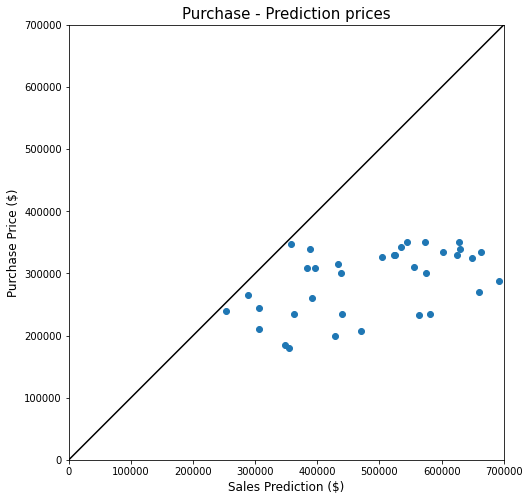

In [209]:
# Transform the object variable (season) values to use in the model

data_a = pd.get_dummies(data_a)

# Define all variates and target

regression_target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
            'sqft_lot15', 'in_seattle', 'basement', 'living_gt15', 'renewed', 'year_built', 'month', 'year',
            'day_week', 'bed_per_sqft', 'bat_per_bed', 'season_fall', 'season_spring', 'season_summer']

X_a = data_a[features]
y_a = data_a[regression_target]

# Trained Model  = estimator_lr

# Predict

predictions_a = estimator_lr.predict(X_a)

# Plot Results

plt.figure(figsize = (8, 8))

plt.axes().set_aspect('equal', 'box')
plt.scatter(predictions_a, data_a['price'])
plt.plot((0, 700000), (0, 700000), 'k-')

plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Purchase - Prediction prices', fontsize = 15)
plt.xlabel("Sales Prediction ($)",fontsize = 12)
plt.ylabel("Purchase Price ($)",fontsize = 12)

plt.show()

#### 8.1.3. Costs

In [210]:
# Purchase of the houses

cost_purch_a = data_a['price'].sum()

# Renovation Cost

cost_const_a = data_a.shape[0] * 2 * 9000 # 2 Bathrooms more, 9,000 dollars each.

# Total Cost

total_cost_a = cost_purch_a + cost_const_a

# Selling

sum_sell_a = predictions_a.sum()

# Profit

lucro_a = sum_sell_a - total_cost_a

print('Purchase Cost:', cost_purch_a)
print('Renovation Cost', cost_const_a)
print('Investment Cost:', total_cost_a) 
print('Estimated Revenue:', sum_sell_a.round(2))
print('Estimated Profit:', lucro_a.round(2))
print(f'Profits margin: {((lucro_a / total_cost_a) * 100).round(2)}%')


Purchase Cost: 10059500.0
Renovation Cost 630000
Investment Cost: 10689500.0
Estimated Revenue: 16975725.5
Estimated Profit: 6286225.5
Profits margin: 58.81%


###  8.2. Estrategy B

#### 8.2.1. Data Preparation

In [211]:
# Create a copy to work with in strategy B

data_b = dataset.copy()

# Filter 1 #Bedrooms = 2
data_b = data_b[data_b['bedrooms'] == 2] # 2760 houses

# Filter 2 not renewed
data_b = data_b[data_b['yr_renovated'] == 0] # 2647 houses

# Filter 3 sqft_living de 1000 sqft
data_b = data_b[(data_b['sqft_living'] < 1000) & (data_b['sqft_living'] > 500)] # 907 houses

# Filter 4 sqft_lot < 4000 sqft
data_b = data_b[data_b['sqft_lot'] < 4000] # 179 houses

# Filter 5 < 250001
data_b = data_b[data_b['price'] < 250001] # 27 houses

data_b = data_b.reset_index(drop = True)

In [212]:
## Data Preparation

# Seattle
data_b['in_seattle'] = (data_b['zipcode'].isin(zip_seattle)).astype(int)

# basement
data_b['basement'] = (data_b['sqft_basement'] != 0).astype(int)

# # Greater than 15 neighbors
data_b['living_gt15'] = (data_b['sqft_living'] > data_b['sqft_living15']).astype(int)

# Renewed
data_b['date'] = data_b['date'].astype('datetime64')
data_b['renewed'] = (data_b['yr_renovated'] != 0).astype(int)

# Ano Built

labels = []

for row in range(data_b.shape[0]):
  if data_b['date'][row].year - data_b['yr_built'][row] < 10:
    labels.append(1)
  elif data_b['date'][row].year - data_b['yr_built'][row] < 30:
    labels.append(2)
  elif data_b['date'][row].year - data_b['yr_built'][row] < 50:
    labels.append(3)
  elif data_b['date'][row].year - data_b['yr_built'][row] < 70:
    labels.append(4)
  else:
    labels.append(5)

data_b['year_built'] = labels

# Year, Month and Day

data_b['year'] = data_b['date'].dt.year
data_b['month'] = data_b['date'].dt.month
data_b['day_week'] = data_b['date'].dt.dayofweek

# Season

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons = []

for row in range(data_b.shape[0]):
  doy = data_b['date'][row].timetuple().tm_yday
  if doy in spring:
    seasons.append('spring')
  elif doy in summer:
    seasons.append('summer')
  elif doy in fall:
    seasons.append('fall')
  else:
    seasons.append('winter')

data_b['season'] = seasons

# Bedrooms per sqft
data_b['bed_per_sqft'] = (data_b['bedrooms'] / data_b['sqft_living'])

# Bathrooms per bedrooms
data_b['bat_per_bed'] = (data_b['bathrooms'] / data_b['bedrooms'])

data_b.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,basement,living_gt15,renewed,year_built,year,month,day_week,season,bed_per_sqft,bat_per_bed
0,6300000693,2014-12-02,233000.0,2,2.25,850,1656,2.0,0,0,3,8,850,0,2001,0,98133,47.7064,-122.344,850,1312,1,0,0,0,2,2014,12,1,fall,0.002353,1.125
1,3352402250,2014-10-21,119900.0,2,1.00,700,3180,1.0,0,0,3,6,480,220,1951,0,98178,47.4976,-122.262,1760,6360,0,1,0,0,4,2014,10,1,fall,0.002857,0.500
2,3145600250,2015-03-17,190000.0,2,1.00,670,3101,1.0,0,0,4,6,670,0,1948,0,98118,47.5546,-122.274,1660,4100,1,0,0,0,4,2015,3,1,winter,0.002985,0.500
3,3530500010,2014-09-30,176000.0,2,1.00,920,2332,1.0,0,0,4,8,920,0,1980,0,98198,47.3779,-122.320,1310,2853,0,0,0,0,3,2014,9,1,fall,0.002174,0.500
4,6911700066,2014-06-04,175000.0,2,1.00,670,2378,1.0,0,0,3,5,670,0,1919,0,98126,47.5769,-122.372,700,2970,1,0,0,0,5,2014,6,2,spring,0.002985,0.500


Variables after renovations:

In [213]:
# Variables after renovations

# Bedrooms

data_b['bedrooms'] = data_b['bedrooms'] + 1 

# Bathrooms

data_b['bathrooms'] = data_b['bathrooms'] + 1 

# sqft_living

data_b['sqft_living'] = data_b['sqft_living'] + 140 

# Bed per SQFT
data_b['bed_per_sqft'] = (data_b['bedrooms'] / data_b['sqft_living'])

# Bat per BAt
data_b['bat_per_bed'] = (data_b['bathrooms'] / data_b['bedrooms'])

# Renovation

data_b['renewed'] = 1

# New date of selling

#To increment 4 months to the data
for row in range(data_b.shape[0]):
  data_b['date'][row] = data_b['date'][row] +relativedelta(months=+4)

# Year, Month and Day

data_b['year'] = data_b['date'].dt.year
data_b['month'] = data_b['date'].dt.month
data_b['day_week'] = data_b['date'].dt.dayofweek

# Season

doy = datetime.today().timetuple().tm_yday

spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons = []

for row in range(data_b.shape[0]):
  doy = data_b['date'][row].timetuple().tm_yday
  if doy in spring:
    seasons.append('spring')
  elif doy in summer:
    seasons.append('summer')
  elif doy in fall:
    seasons.append('fall')
  else:
    seasons.append('winter')

data_b['season'] = seasons

data_b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,in_seattle,basement,living_gt15,renewed,year_built,year,month,day_week,season,bed_per_sqft,bat_per_bed
0,6300000693,2015-04-02,233000.0,3,3.25,990,1656,2.0,0,0,3,8,850,0,2001,0,98133,47.7064,-122.344,850,1312,1,0,0,1,2,2015,4,3,spring,0.003030,1.083333
1,3352402250,2015-02-21,119900.0,3,2.00,840,3180,1.0,0,0,3,6,480,220,1951,0,98178,47.4976,-122.262,1760,6360,0,1,0,1,4,2015,2,5,winter,0.003571,0.666667
2,3145600250,2015-07-17,190000.0,3,2.00,810,3101,1.0,0,0,4,6,670,0,1948,0,98118,47.5546,-122.274,1660,4100,1,0,0,1,4,2015,7,4,summer,0.003704,0.666667
3,3530500010,2015-01-30,176000.0,3,2.00,1060,2332,1.0,0,0,4,8,920,0,1980,0,98198,47.3779,-122.320,1310,2853,0,0,0,1,3,2015,1,4,winter,0.002830,0.666667
4,6911700066,2014-10-04,175000.0,3,2.00,810,2378,1.0,0,0,3,5,670,0,1919,0,98126,47.5769,-122.372,700,2970,1,0,0,1,5,2014,10,5,fall,0.003704,0.666667
5,7203601405,2015-08-14,217000.0,3,2.00,870,2400,1.0,0,1,3,4,730,0,1934,0,98198,47.3500,-122.322,1220,4382,0,0,0,1,5,2015,8,4,summer,0.003448,0.666667
6,6300000364,2014-10-16,235000.0,3,2.50,1020,1805,2.0,0,0,3,7,880,0,1999,0,98133,47.7064,-122.342,880,5060,1,0,0,1,2,2014,10,3,fall,0.002941,0.833333
7,3644100072,2015-03-07,245000.0,3,2.00,810,2356,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295,1220,1740,1,0,0,1,4,2015,3,5,winter,0.003704,0.666667
8,3530490160,2014-12-21,178500.0,3,2.00,1070,3447,1.0,0,0,4,8,930,0,1978,0,98198,47.3822,-122.318,1160,3447,0,0,0,1,3,2014,12,6,winter,0.002804,0.666667
9,2781250520,2015-02-16,200000.0,3,2.75,1050,2693,1.0,0,0,3,6,910,0,2003,0,98038,47.3493,-122.025,1360,2693,0,0,0,1,2,2015,2,0,winter,0.002857,0.916667


#### 8.2.2. Machine Learning Model

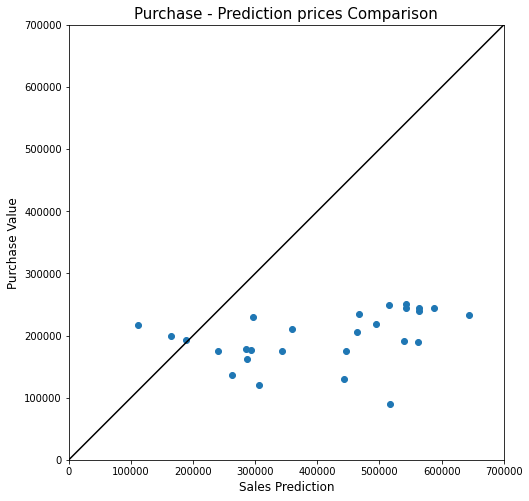

In [214]:
# Transform the object variable (season) values to use in the model

data_b = pd.get_dummies(data_b)

# Define all variates and target

regression_target = 'price'
all_covariates = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
                'sqft_lot15', 'in_seattle', 'basement', 'living_gt15', 'renewed', 'year_built', 'month', 'year',
                'day_week', 'bed_per_sqft', 'bat_per_bed', 'season_fall', 'season_spring', 'season_summer']

X_b = data_b[all_covariates]
y_b = data_b[regression_target]

# Trained Model = estimator_lr

# Predict

predictions_b = estimator_lr.predict(X_b)

# Plot Results

plt.figure(figsize = (8, 8))

plt.axes().set_aspect('equal', 'box')
plt.scatter(predictions_b, data_b['price'])
plt.plot((0, 700000), (0, 700000), 'k-')

plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.title('Purchase - Prediction prices Comparison', fontsize = 15)
plt.xlabel("Sales Prediction",fontsize = 12)
plt.ylabel("Purchase Value",fontsize = 12)

# Show the plot.
plt.show()

#### 8.2.3. Costs

In [215]:

# Purchase of the houses

cost_purch_b = data_b['price'].sum()

# Renovation Cost

cost_const_b = data_b.shape[0] * 50000 # 1 master suite for 50,000 dollars each.

# Total Cost

total_cost_b = cost_purch_b + cost_const_b

# Selling

sum_sell_b = predictions_b.sum()

# Profit

lucro_b = sum_sell_b - total_cost_b

print('Purchase Cost:', cost_purch_b)
print('Renovation Cost', cost_const_b)
print('Investment Cost:', total_cost_b) 
print('Estimated Revenue:', sum_sell_b.round(2))
print('Estimated Profit:', lucro_b.round(2))
print(f'Profits margin: {((lucro_b / total_cost_b) * 100).round(2)}%')

Purchase Cost: 5313750.0
Renovation Cost 1350000
Investment Cost: 6663750.0
Estimated Revenue: 11032345.48
Estimated Profit: 4368595.48
Profits margin: 65.56%


## 9.0. Strategies Summary

**STRATEGY A**

| **Purchase Cost** | **Renovations Cost** | **Total Cost** | **Estimated Revenue** | **Estimated Profit**| **Profit Margin** | **Estimated Revenue (*)** | **Estimated Profit (*)**| **Profit Margin (*)** |
|--|--|--|--|--|--|--|--|--|
| 10.06 M | 0.63 M | 10.69 M | 14.25 M | 3.56 M | 33.35% | 10.79 M | 0.16 M | 1.48% |

*Considering MAPE of 24.22%

Purchase and Estimated Selling Prices for 35 houses selected in Strategy A:

In [216]:
houses_strategyA = pd.DataFrame({'House': data_a['id'], 'Purchase Price': y_a, 'Estimated Sellig Price' : predictions_a.round(1)})
houses_strategyA

,House,Purchase Price,Estimated Sellig Price
0,616000140,315000.0,433485.1
1,1922059046,308000.0,396161.8
2,3226200105,325000.0,648357.3
3,726049190,287500.0,692508.8
4,9265700045,300000.0,575404.8
5,1138000830,310000.0,555714.8
6,3904100106,335000.0,602433.4
7,6791400800,347500.0,356896.9
8,3876810140,326500.0,504763.5
9,423059184,180000.0,354631.4


**STRATEGY B**

| **Purchase Cost** | **Renovations Cost** | **Total Cost** | **Estimated Revenue** | **Estimated Profit**| **Profit Margin** | **Estimated Revenue (*)** | **Estimated Revenue (*)**| **Profit Margin (*)** |
|--|--|--|--|--|--|--|--|--|
| 5.31 M | 1.35 M | 6.66 M | 11.03 M | 4.37 M | 65.56% | 8.36 M | $1.70 M| 25.50% |

*Considering MAPE of 24.22%

Purchase and Estimated Selling Prices for 27 houses selected in Strategy B:

In [217]:
houses_strategyB = pd.DataFrame({'House': data_b['id'], 'Purchase Price': y_b, 'Estimated Sellig Price' : predictions_b.round(1)})
houses_strategyB

,House,Purchase Price,Estimated Sellig Price
0,6300000693,233000.0,644822.2
1,3352402250,119900.0,305884.3
2,3145600250,190000.0,562440.5
3,3530500010,176000.0,292471.8
4,6911700066,175000.0,446919.8
5,7203601405,217000.0,111339.6
6,6300000364,235000.0,467079.8
7,3644100072,245000.0,543527.2
8,3530490160,178500.0,285854.3
9,2781250520,200000.0,164586.3


**Conclusion**

>  * Strategy A - Estimated profits from 1.49% - 33.35%
>  * Strategy B - Estimated profits from 25.50% - 65.56% 